In [1]:
!pwd
import sys
%reload_ext autoreload
%autoreload 2
%matplotlib inline
sys.executable

/c/Users/81908/jupyter_notebook/tf_2_work/kindle_data_analysis


'C:\\Users\\81908\\Anaconda3\\envs\\tfgpu\\python.exe'

# Kindleの蔵書リストをGoogle Colaboratoryでデータ分析してみた 
- https://karaage.hatenadiary.jp/entry/2020/07/20/073000

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams["font.family"] = 'Yu Gothic'   # Yu Gothic指定すれば日本語出せる

df = pd.read_csv("Kindle.csv", index_col="PurchaseDate", parse_dates=["PurchaseDate"])

df["year"] = df.index.year
df["month"] = df.index.month
df["dayofweek"] = df.index.dayofweek
df["day"] = df.index.day

# タイトルのカッコの中にある出版社情報や巻数情報を削除
df['title_renamed'] = df['Title'].str.replace(r'\s*\([^()]*\)','').str.replace(r'\s*\（[^()]*\）','').str.strip()

# タイトルの文字数の列を作る
df['title_length'] = list(pd.Series(df['title_renamed']).apply(lambda x: len(x)))

df.head()

,ASIN,Title,Authors,year,month,dayofweek,day,title_renamed,title_length
PurchaseDate,,,,,,,,,
2017-04-22,B06XWVH285,100万円の女たち（１）【期間限定 無料お試し版】 (ビッグコミックス),青野春秋,2017,4,5,22,100万円の女たち【期間限定 無料お試し版】,22
2017-01-07,B01MXW9Y97,1518！ イチゴーイチハチ！（１）【期間限定 無料お試し版】 (ビッグコミックス),相田裕,2017,1,5,7,1518！ イチゴーイチハチ！【期間限定 無料お試し版】,28
2019-02-18,B07MYV5DTR,33歳独身女騎士隊長。 (KATTS),天原,2019,2,0,18,33歳独身女騎士隊長。,11
2018-10-07,B07GZKSBGX,34歳無職さん 1【期間限定 無料お試し版】 (MFコミックス フラッパーシリーズ),いけだたかし,2018,10,6,7,34歳無職さん 1【期間限定 無料お試し版】,22
2019-05-25,B07GWBMYFB,A子さんの恋人 1巻 (HARTA COMIX),近藤 聡乃,2019,5,5,25,A子さんの恋人 1巻,10


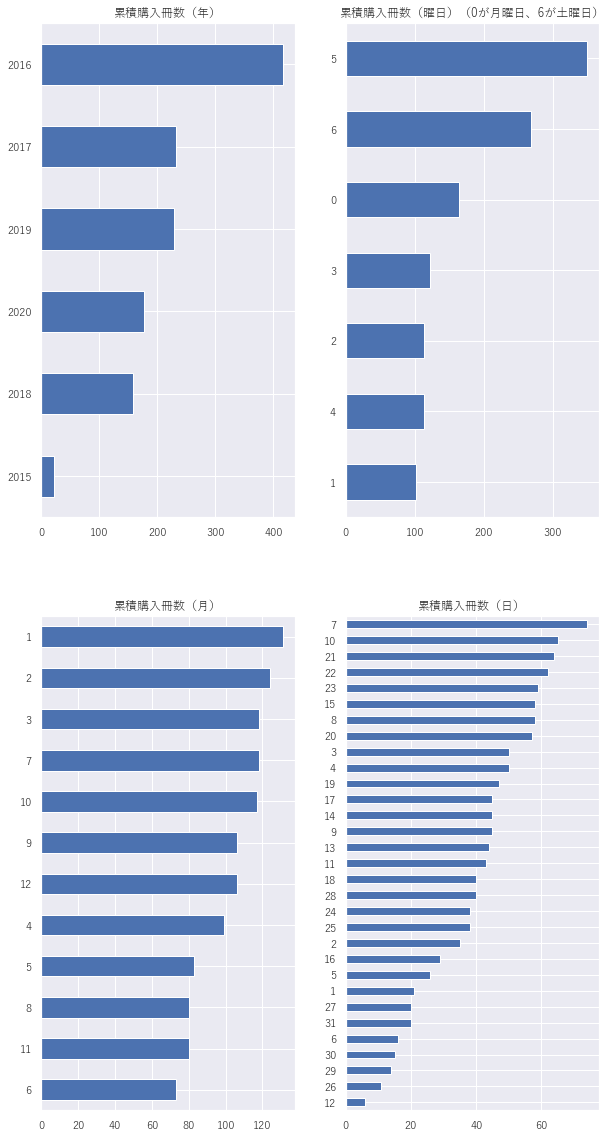

In [3]:
# 年、月、曜日、日での累積購入冊数
fig, ax = plt.subplots(2, 2, figsize=(10, 20))

_df = df["year"].value_counts().sort_values()
_df.plot.barh(ax=ax[0, 0], title="累積購入冊数（年）")

_df = df["month"].value_counts().sort_values()
_df.plot.barh(ax=ax[1, 0], title="累積購入冊数（月）")

_df = df["dayofweek"].value_counts().sort_values()
_df.plot.barh(ax=ax[0, 1], title="累積購入冊数（曜日）（0が月曜日、6が土曜日）")

_df = df["day"].value_counts().sort_values()
_df.plot.barh(ax=ax[1, 1], title="累積購入冊数（日）")

plt.show()
plt.clf()  # メモリ解放
plt.close()

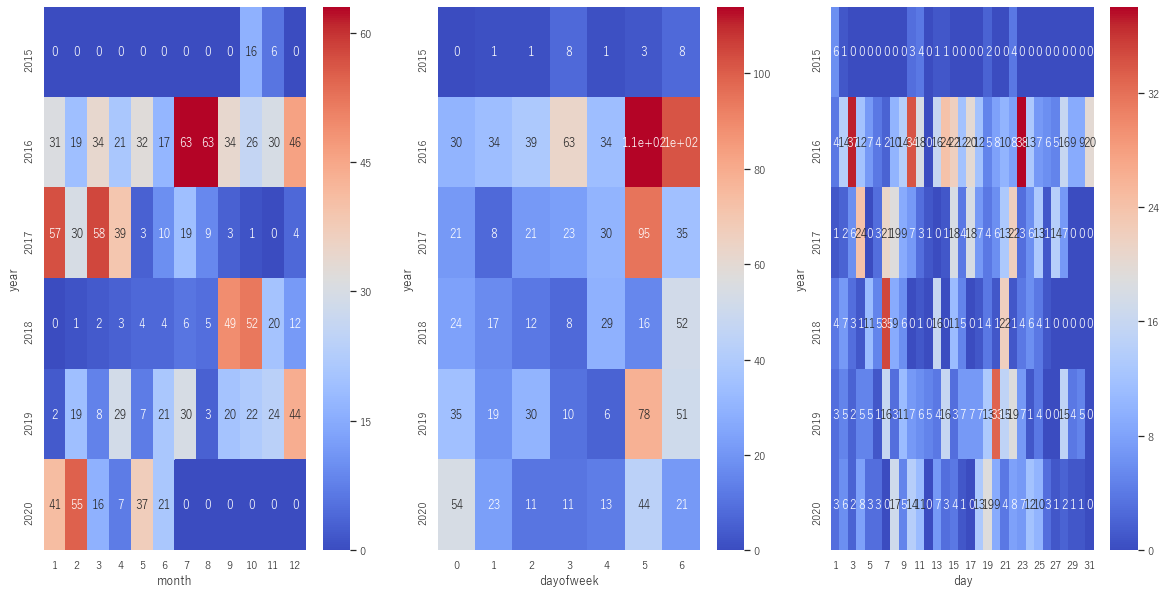

In [4]:
# 購入冊数が多い年月
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

df_cross = pd.crosstab(df['year'], df["month"])
sns.heatmap(df_cross, cmap='coolwarm', annot=True, ax=ax[0])

df_cross = pd.crosstab(df['year'], df["dayofweek"])
sns.heatmap(df_cross, cmap='coolwarm', annot=True, ax=ax[1])

df_cross = pd.crosstab(df['year'], df["day"])
sns.heatmap(df_cross, cmap='coolwarm', annot=True, ax=ax[2])

plt.show()
plt.clf()  # メモリ解放
plt.close()

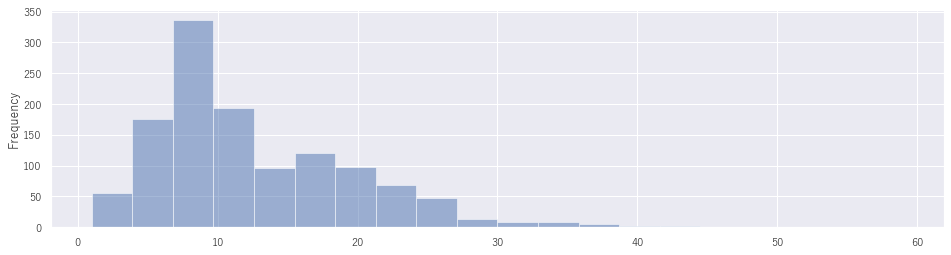

In [5]:
# タイトルの文字数のヒストグラム
df['title_length'].plot(kind='hist', bins=20, figsize=(16,4), alpha=0.5)

In [6]:
# 同タイトルの冊数
df['title_renamed'].value_counts()

ヴィンランド・サガ                     23
ザ・ファブル                        22
インベスターZ                       21
アサギロ～浅葱狼～                     18
十　～忍法魔界転生～                    13
                              ..
変女～変な女子高生 甘栗千子～【期間限定無料版】 3     1
【無料お試し版】MATSUMOTO              1
イジらないで、長瀞さん                    1
らんま1/2〔新装版〕【期間限定　無料お試し版】       1
３．３．７ビョーシ！！                    1
Name: title_renamed, Length: 850, dtype: int64

In [7]:
# 同著者の冊数
df['Authors'].value_counts()

尾田栄一郎      36
山田風太郎      27
徳弘正也       26
幸村誠        23
南勝久        23
           ..
渡辺ペコ        1
麻生みこと       1
にくまん子       1
岩永亮太郎       1
ダイヤモンド社     1
Name: Authors, Length: 416, dtype: int64